# OFFICE HOURS for 04/23/20

- online-ds-pt-100719
- 04/23/20

## Questions & Answers 

- Outliers - when/if to address them?
    - Depends on model:
        - For tree-based models, outliers are not an issue.
        - For Logistic Regression, outliers ARE an issue.
        
        

-  How to use graphviz visualization of trees with random forests
    - need to pull an individual forest
    - `model.estimators_[0]`
    
    
    
- roc/auc for multiclassification?
    - use yellowbrick , sklearn does not work for multiclass 
        - Thanks for the rec Michael!
        
        
- Visualizations (see section at bottom of notebook):
    - Can make a barh plot showing the `df.corr()` between your target and your features
    - Can use seaborn's `sns.barplot()` with the `hue` parameter (specifies which column to use to break up the data)

> Note: this is a modified version of my project as a student
___
# Final Project Submission
* Student name: James M. Irivng, Ph.D.
* Student pace: full time
* Scheduled project review date/time: 05/15/19 2:30 pm
* Instructor name: Jeff Herman / Brandon Lewis
* Blog post URL:


## Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=800>

### Detailed variable descriptions:

- **Fiscal Year Released**
    - Fiscal year (year ending June 30) for which the offender was released from prison.

- **Recidivism Reporting Year**
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- **Race - Ethnicity**
    - Offender's Race and Ethnicity

- **Convicting Offense Classification**
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- **Convicting Offense Type**
    - General category for the most serious offense for which the offender was placed in prison.

- **Convicting Offense Subtype**
    - Further classification of the most serious offense for which the offender was placed in prison.

- **Release Type**
    - Reasoning for Offender's release from prison.

- **Main Supervising District**
    - The Judicial District supervising the offender for the longest time during the tracking period.

- **Recidivism - Return to Prison**
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period
    
- **Part of Target Population** 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

## USING THE OSEMN MODEL TO GUIDE WORKFLOW

1. **OBTAIN:**
    - [x] Import data, inspect, check for datatypes to convert and null values
<br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
    - [x] Check for missing values 
    - [x] Check for multicollinearity
    - [x] Normalize data (may want to do after some exploring)   
    <br><br>
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
    <br><br>

   
4. **FIT AN INITIAL MODEL:** 
    - [x] Assess the model.
        <br><br>
5. **REVISE THE FITTED MODEL**
    - [x] Adjust chosen model and hyper-parameters
    <br><br>
6. **HOLDOUT VALIDATION**
    - [ ] Perform cross-validation
___

# OBTAIN:
## Importing Packages

### Using Custom PyPi Package - BroadSteel DataScience (bs_ds)


<img src="https://bs-ds.readthedocs.io/en/latest/_images/bs_ds_logo.png" width=200>

- **Used several EDA functions from bs_ds.bamboo module:**
    - inspect_df
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.inspect_df
    - check_null
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_null
    - check_unique
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_unique
    - check_column
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_column
    - check_numeric
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_numeric
    - big_pandas
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.big_pandas
    - ignore_warnings
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.ignore_warnings
    - drop_cols
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.drop_cols

In [1]:
from IPython.display import clear_output
!pip install -U bs_ds
clear_output()

In [2]:
# Import custom python package BroadSteel DataScience (bs_ds_)
from bs_ds.imports import *
from bs_ds.bamboo import inspect_df, check_null, check_unique, check_column, check_numeric, big_pandas, ignore_warnings

bs_ds  v0.11.1 loaded.  Read the docs: https://bs-ds.readthedocs.io/en/latest/index.html
> For convenient loading of standard modules use: `from bs_ds.imports import *`



Package,Handle,Description
bs_ds,bs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


In [3]:
# Enabling full-sized dataframes and info rows
big_pandas()

# Turning off warnings for function deprecations
ignore_warnings()

# Defining colorscheme for notebook
plt.style.use('dark_background')

# Adding CSS styled tables 
from bs_ds.prettypandas import *

## Loading the dataset and removing unrelated columns

In [4]:
# Dataset Links
full_all_prisoners_file = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"#"datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"
# only_repeat_criminals_w_new_crime_file= "datasets/prison_recidivists_with_recidivism_type_only.csv"

In [5]:
# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(full_all_prisoners_file)

**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [6]:
from bs_ds.bamboo import drop_cols
df = drop_cols(df, ['New','Days','Recidivism Type'])

### Save original names vs short names in column_legend
- then map names onto columns

In [7]:
print(df.columns)

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype', 'Release Type',
       'Main Supervising District', 'Recidivism - Return to Prison',
       'Part of Target Population', 'Sex'],
      dtype='object')


In [8]:
# New short-hand names to use
colnames_short = ('yr_released','report_year','race_ethnicity',
                  'age_released','crime_class','crime_type',
                  'crime_subtype','release_type','super_dist',
                  'recidivist','target_pop','sex')

# Zipping the original and new into a renaming dictionary
column_legend = dict(zip(df.columns,colnames_short))
# Rename df with shorter names
df.rename(mapper=column_legend, axis=1, inplace=True)
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


# SCRUB / EXPLORE
## EDA with Pandas_Profiling

In [9]:
import pandas_profiling as pp

In [10]:
pp.ProfileReport(df)

## ADDRESSING NULL VALUES

In [11]:
# check_null(df)

**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_released has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace with "unknown"
- release_type has 1762 (6.77% of data)
    - drop
    
**Dropping all null values from age_released, race_ethnicity, and release_type.**

In [12]:
from bs_ds import prettypandas as pp
pp.html_on(CSS=['body{ text-align: center}'])

In [13]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
yr_released       26020 non-null int64
report_year       26020 non-null int64
race_ethnicity    25990 non-null object
age_released      26017 non-null object
crime_class       26020 non-null object
crime_type        26020 non-null object
crime_subtype     26020 non-null object
release_type      24258 non-null object
super_dist        16439 non-null object
recidivist        26020 non-null object
target_pop        26020 non-null object
sex               26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


None

,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0
report_year,0,26020,0
race_ethnicity,30,26020,0.115
age_released,3,26020,0.012
crime_class,0,26020,0
crime_type,0,26020,0
crime_subtype,0,26020,0
release_type,1762,26020,6.772
super_dist,9581,26020,36.82


,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male


In [14]:
# Filling NA's in super_dist and release_type
df.dropna(subset=['age_released','race_ethnicity','sex','release_type'],inplace=True)
df['super_dist'].fillna("unknown", inplace=True)
# check_null(df)

___
## COMBINING AND REMAPPING CLASSES

### df['race_ethnicity']

In [15]:
# check_unique(df,['race_ethnicity'])

- **Remapping race_ethnicity**
    - Due to the low numbers for several of the race_ethnicity types, reducing and combining Hispanic and Non-Hispanic groups
    - Alternative approach of separating race and ethnicity into 2 separate features was rejected after modeling

In [16]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

# Replacing original race_ethnicity column with remapped one.
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)

In [17]:
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White,25-34,D Felony,Property,Theft,Discharged – End of Sentence,unknown,Yes,No,Male
2,2010,2013,White,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,unknown,Yes,No,Male


In [18]:
# check_unique(df,['race_ethnicity'])

### df['crime_class']

- **Remapping crime_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [19]:
check_unique(df,['crime_class'])


---------------------------

crime_class Type: object
Number unique values: 14.


,crime_class
D Felony,9786
C Felony,6453
Aggravated Misdemeanor,4327
B Felony,1716
Felony - Enhancement to Original Penalty,1488
Felony - Enhanced,220
Serious Misdemeanor,139
Special Sentence 2005,69
Felony - Mandatory Minimum,10
Other Felony,6


In [20]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)

### df['age_released']

- **Encoding age groups as ordinal**

In [21]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))

# Mapping age_map onto 'age_released'
df['age_released'] = df['age_released'].map(age_map)

### Remapping binary categories df[['recidivist','target_pop','sex']]

In [22]:
## Remapping binary categories

# Recidivist
recidivist_map = {'No':0,'Yes':1}
df['recidivist'] = df['recidivist'].map(recidivist_map)

# Target_pop
target_pop_map = {'No':0,'Yes':1}
df['target_pop'] = df['target_pop'].map(target_pop_map)

#sex_map
sex_map = {'Male':0,'Female':1}
df['sex'] = df['sex'].map(sex_map)

___
## ENGINEERING FEATURES
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

### Creating a simple 'felony' feature

In [23]:
# Engineering a simple 'felony' true false category
df['felony'] = df['crime_class'].str.contains('felony',case=False)
df['crime_types_combined'] = df['crime_type']+'_'+df['crime_subtype']
# Combining crime_type and crime_subtype into types_combined
df['crime_class_type_subtype']= df['crime_class']+'_'+df['crime_type']+'_'+df['crime_subtype']

### Creating a 'max_sentence' feature based on crime class max penalties
   

In [24]:
# Mapping years onto crime class
crime_class_max_sentence_map = {'A Felony': 75,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 50, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 0.83} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['crime_class'].map(crime_class_max_sentence_map)

### Dropping all  values replaced with np.nan

In [25]:
check_null(df)

,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0
report_year,0,24225,0
race_ethnicity,1,24225,0.004
age_released,0,24225,0
crime_class,18,24225,0.074
crime_type,0,24225,0
crime_subtype,0,24225,0
release_type,0,24225,0
super_dist,0,24225,0


In [26]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
# check_null(df)

In [27]:
df.to_csv('Iowa_recidivism_features_pre-processing.csv')

## Processing Chosen Feature Columns

In [28]:
# List of features to be analyzed as categories
category_cols = ['yr_released','race_ethnicity', 'crime_class',
                 'release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony']

# List of features to be analzyed as numbers
number_cols = ['max_sentence','age_released']

# Target feature
target_col = ['recidivist']

In [29]:
# Creating new dataframe ('df_to_split') to contain processed features for train_test_split
df_to_split=pd.DataFrame()

# MinMaxing Numerical Columns
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

for header in number_cols:
    print(header)
    data = np.array(df[header])
    res = sca.fit_transform(data.reshape(-1,1))
    df_to_split[header] = res.ravel()    

max_sentence
age_released


In [30]:
# Convert categories to cat.codes
for header in category_cols:
    df_to_split[header] = df[header].astype('category').cat.codes
    
df_to_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24206 entries, 0 to 24205
Data columns (total 12 columns):
max_sentence      24206 non-null float64
age_released      24206 non-null float64
yr_released       24206 non-null int8
race_ethnicity    24206 non-null int8
crime_class       24206 non-null int8
release_type      24206 non-null int8
crime_type        24206 non-null int8
crime_subtype     24206 non-null int8
target_pop        24206 non-null int8
sex               24206 non-null int8
super_dist        24206 non-null int8
felony            24206 non-null int8
dtypes: float64(2), int8(10)
memory usage: 614.7 KB


# FITTING AN INITIAL MODEL
## Surveying Potential Algorithms with bs_ds
- select_pca:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.select_pca
- thick_pipe:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.thick_pipe


In [31]:
# from bs_ds.bs_ds import select_pca, thick_pipe

In [32]:
X =pd.get_dummies(df_to_split, columns=category_cols, drop_first=True)
y = df['recidivist']

In [33]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

#### Running select_pca to identify # of components that still explains 80% of variance

In [34]:
# select_pca(X_train) #,n_components_list=[range(10, X_train.shape[1]-1)])

In [35]:
# Running thick_pipe to test alogorithms
# thick_pipe(X_train, y_train, n_components=17)

### >>> Fast-Forwarding through trial and error:
- Regardless of changes to preprocessing and feature engineering, accuracy scores never increased about 0.68
- One major concern was the vast majority of our features are categorical.
    - Therefore, we investigated using another Machine Learning package, **CatBoost**

## FITTING AN INITIAL MODEL USING CatBoostClassifier

In [36]:
# Define X and y to split
X = df_to_split
y = pd.Series(df[target_col].to_numpy().ravel())
y.name = 'recidivist'

In [37]:
# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [38]:
# Import catboost Pool to create training and testing pools
from catboost import Pool, CatBoostClassifier

train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [39]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=500, depth=12,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            silent=True,
                            allow_const_label=True)#,
                           #task_type='GPU')

In [40]:
# Fitting Initial CatBoost Model
cb_base.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=10)
cb_base.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.6324211046804734},
 'validation': {'Logloss': 0.6345649964056295, 'AUC': 0.658624195498886}}

In [41]:
# catboost.core.CatBoostClassifier
# help(cb_base.get_params())

### VISUAL SUMMARY OF BASE MODEL

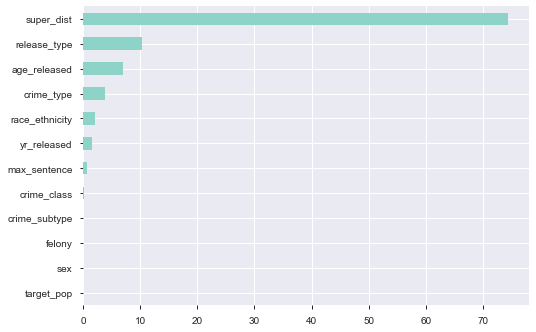

In [42]:
# Plotting Feature Importances
important_feature_names = cb_base.feature_names_
important_feature_scores = cb_base.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)
important_features.sort_values().plot(kind='barh')

#### Defining Roc_Auc Curve

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

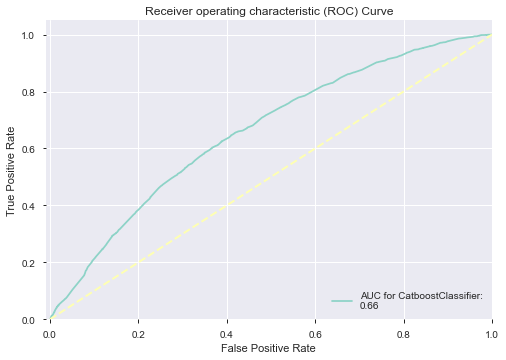

In [44]:
# Define plot_auc_roc_curve
def plot_auc_roc_curve(y_test, y_test_pred):
    """ Takes y_test and y_test_pred from a ML model and plots the AUC-ROC curve."""
    auc = roc_auc_score(y_test, y_test_pred[:,1])

    FPr, TPr, thresh  = roc_curve(y_test, y_test_pred[:,1])
    plt.plot(FPr, TPr,label=f"AUC for CatboostClassifier:\n{round(auc,2)}" )

    plt.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot roc_auc_curve
y_test_pred = cb_base.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

Normalized confusion matrix
[[0.99810066 0.00189934]
 [0.99257058 0.00742942]]


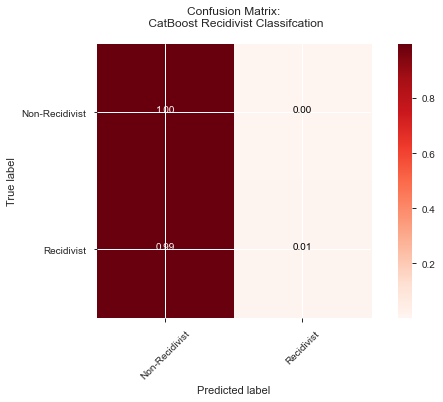

In [45]:
import itertools
from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_base.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Non-Recidivist', 'Recidivist'], normalize=True, cmap='Reds',
                      title='Confusion Matrix:\n CatBoost Recidivist Classifcation\n')

### Notes Following Initial Modeling:
- The ROC-AUC Curve Shows that our model performs better than chance. 
- HOWEVE, There is a major issue with our confusion matrix.
    - There are an extremely high # of False Negatives (prisoners Predicted to be "Non-Recidivist",but were actually "Recidivist")
    - This is a serious flaw with the model and serious hinders real-world applicability. 
- This may be due to the imbalance of cases of recidivists vs non-recidivists in our dataset.

# REVISING THE MODEL
## Balancing Target Classes Using Synthetic Minority Oversampling

In [46]:
# Define X and y 
X = df_to_split
y = pd.Series(df[target_col].to_numpy().ravel())
y.name = 'recidivist'

In [47]:
# df=pd.concat([y,X], axis=1)

In [48]:
# import pandas_profiling as pp
# pp.ProfileReport(df)

### Addressing the Imbalanced Class Issue
- Adding Synthetic Minority Oversampling Technique to balance out the # of recidivists(1) and non-recidivists(0)

In [49]:
from imblearn.over_sampling import SMOTE

print(pd.Series(y).value_counts())

X_resampled, y_resampled = SMOTE().fit_sample(X,y)

print(pd.Series(y_resampled).value_counts())

Using TensorFlow backend.


0    15880
1     8326
Name: recidivist, dtype: int64
1    15880
0    15880
Name: recidivist, dtype: int64


In [50]:
# Reformatting SMOTE transformed data

# X_resampled back to a dataframe
X_resampled = pd.DataFrame(X_resampled, columns = X.columns)

# X_resampled category columns back to integers
for header in category_cols:
    X_resampled[header] = X_resampled[header].astype('int')
    
# y_resampled back to a named series    
y_resampled = pd.Series(y_resampled)
y_resampled.name ='recidivist'

### Fitting a Revised Model with Balanced Classes

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4)

In [52]:
from catboost import Pool, CatBoostClassifier
train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [53]:
cb_clf = CatBoostClassifier(iterations=3000, depth=5,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            allow_const_label=True)#,
#                            logging_level='Info')#,
                           #task_type='GPU')


In [54]:
cb_clf.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=20)
# cb_clf.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6865404	best: 0.6865404 (0)	total: 35.5ms	remaining: 1m 46s
1:	test: 0.6991625	best: 0.6991625 (1)	total: 66.8ms	remaining: 1m 40s
2:	test: 0.7056193	best: 0.7056193 (2)	total: 105ms	remaining: 1m 44s
3:	test: 0.7051412	best: 0.7056193 (2)	total: 132ms	remaining: 1m 38s
4:	test: 0.7091641	best: 0.7091641 (4)	total: 159ms	remaining: 1m 35s
5:	test: 0.7092940	best: 0.7092940 (5)	total: 185ms	remaining: 1m 32s
6:	test: 0.7089269	best: 0.7092940 (5)	total: 214ms	remaining: 1m 31s
7:	test: 0.7124047	best: 0.7124047 (7)	total: 248ms	remaining: 1m 32s
8:	test: 0.7180264	best: 0.7180264 (8)	total: 282ms	remaining: 1m 33s
9:	test: 0.7182064	best: 0.7182064 (9)	total: 311ms	remaining: 1m 33s
10:	test: 0.7192226	best: 0.7192226 (10)	total: 337ms	remaining: 1m 31s
11:	test: 0.7200485	best: 0.7200485 (11)	total: 369ms	remaining: 1m 31s
12:	test: 0.7207687	best: 0.7207687 (12)	total: 407ms	remaining: 1m 33s
13:	test: 0.7224653	best: 0.7224653 (13)	total: 442ms	remaining: 1m 34s
14:	test: 

121:	test: 0.7657028	best: 0.7657028 (121)	total: 3.72s	remaining: 1m 27s
122:	test: 0.7657636	best: 0.7657636 (122)	total: 3.75s	remaining: 1m 27s
123:	test: 0.7657144	best: 0.7657636 (122)	total: 3.76s	remaining: 1m 27s
124:	test: 0.7657573	best: 0.7657636 (122)	total: 3.79s	remaining: 1m 27s
125:	test: 0.7657969	best: 0.7657969 (125)	total: 3.81s	remaining: 1m 26s
126:	test: 0.7659240	best: 0.7659240 (126)	total: 3.83s	remaining: 1m 26s
127:	test: 0.7659833	best: 0.7659833 (127)	total: 3.85s	remaining: 1m 26s
128:	test: 0.7660072	best: 0.7660072 (128)	total: 3.88s	remaining: 1m 26s
129:	test: 0.7660746	best: 0.7660746 (129)	total: 3.91s	remaining: 1m 26s
130:	test: 0.7661175	best: 0.7661175 (130)	total: 3.94s	remaining: 1m 26s
131:	test: 0.7661778	best: 0.7661778 (131)	total: 3.98s	remaining: 1m 26s
132:	test: 0.7662313	best: 0.7662313 (132)	total: 4.02s	remaining: 1m 26s
133:	test: 0.7663541	best: 0.7663541 (133)	total: 4.05s	remaining: 1m 26s
134:	test: 0.7664288	best: 0.7664288 (

234:	test: 0.7710282	best: 0.7710282 (234)	total: 6.93s	remaining: 1m 21s
235:	test: 0.7710381	best: 0.7710381 (235)	total: 6.97s	remaining: 1m 21s
236:	test: 0.7710427	best: 0.7710427 (236)	total: 7s	remaining: 1m 21s
237:	test: 0.7710555	best: 0.7710555 (237)	total: 7.02s	remaining: 1m 21s
238:	test: 0.7710745	best: 0.7710745 (238)	total: 7.06s	remaining: 1m 21s
239:	test: 0.7710629	best: 0.7710745 (238)	total: 7.08s	remaining: 1m 21s
240:	test: 0.7710308	best: 0.7710745 (238)	total: 7.1s	remaining: 1m 21s
241:	test: 0.7710401	best: 0.7710745 (238)	total: 7.12s	remaining: 1m 21s
242:	test: 0.7710401	best: 0.7710745 (238)	total: 7.13s	remaining: 1m 20s
243:	test: 0.7710603	best: 0.7710745 (238)	total: 7.16s	remaining: 1m 20s
244:	test: 0.7710733	best: 0.7710745 (238)	total: 7.18s	remaining: 1m 20s
245:	test: 0.7710733	best: 0.7710745 (238)	total: 7.19s	remaining: 1m 20s
246:	test: 0.7710801	best: 0.7710801 (246)	total: 7.21s	remaining: 1m 20s
247:	test: 0.7710936	best: 0.7710936 (247)

350:	test: 0.7739016	best: 0.7739135 (349)	total: 9.97s	remaining: 1m 15s
351:	test: 0.7740041	best: 0.7740041 (351)	total: 10.1s	remaining: 1m 15s
352:	test: 0.7741574	best: 0.7741574 (352)	total: 10.1s	remaining: 1m 15s
353:	test: 0.7741571	best: 0.7741574 (352)	total: 10.2s	remaining: 1m 15s
354:	test: 0.7742549	best: 0.7742549 (354)	total: 10.2s	remaining: 1m 16s
355:	test: 0.7742925	best: 0.7742925 (355)	total: 10.2s	remaining: 1m 16s
356:	test: 0.7743978	best: 0.7743978 (356)	total: 10.3s	remaining: 1m 16s
357:	test: 0.7744001	best: 0.7744001 (357)	total: 10.3s	remaining: 1m 16s
358:	test: 0.7744500	best: 0.7744500 (358)	total: 10.3s	remaining: 1m 16s
359:	test: 0.7745448	best: 0.7745448 (359)	total: 10.4s	remaining: 1m 15s
360:	test: 0.7745827	best: 0.7745827 (360)	total: 10.4s	remaining: 1m 15s
361:	test: 0.7745859	best: 0.7745859 (361)	total: 10.4s	remaining: 1m 16s
362:	test: 0.7745966	best: 0.7745966 (362)	total: 10.5s	remaining: 1m 16s
363:	test: 0.7745814	best: 0.7745966 (

467:	test: 0.7777299	best: 0.7777299 (467)	total: 14s	remaining: 1m 15s
468:	test: 0.7777612	best: 0.7777612 (468)	total: 14s	remaining: 1m 15s
469:	test: 0.7777796	best: 0.7777796 (469)	total: 14.1s	remaining: 1m 15s
470:	test: 0.7778093	best: 0.7778093 (470)	total: 14.1s	remaining: 1m 15s
471:	test: 0.7778239	best: 0.7778239 (471)	total: 14.1s	remaining: 1m 15s
472:	test: 0.7778325	best: 0.7778325 (472)	total: 14.2s	remaining: 1m 15s
473:	test: 0.7778394	best: 0.7778394 (473)	total: 14.2s	remaining: 1m 15s
474:	test: 0.7778838	best: 0.7778838 (474)	total: 14.2s	remaining: 1m 15s
475:	test: 0.7778852	best: 0.7778852 (475)	total: 14.3s	remaining: 1m 15s
476:	test: 0.7779835	best: 0.7779835 (476)	total: 14.3s	remaining: 1m 15s
477:	test: 0.7779979	best: 0.7779979 (477)	total: 14.3s	remaining: 1m 15s
478:	test: 0.7780190	best: 0.7780190 (478)	total: 14.4s	remaining: 1m 15s
479:	test: 0.7780302	best: 0.7780302 (479)	total: 14.4s	remaining: 1m 15s
480:	test: 0.7780435	best: 0.7780435 (480)

584:	test: 0.7792797	best: 0.7792797 (584)	total: 17.6s	remaining: 1m 12s
585:	test: 0.7792739	best: 0.7792797 (584)	total: 17.6s	remaining: 1m 12s
586:	test: 0.7792735	best: 0.7792797 (584)	total: 17.6s	remaining: 1m 12s
587:	test: 0.7793053	best: 0.7793053 (587)	total: 17.7s	remaining: 1m 12s
588:	test: 0.7792967	best: 0.7793053 (587)	total: 17.7s	remaining: 1m 12s
589:	test: 0.7792965	best: 0.7793053 (587)	total: 17.7s	remaining: 1m 12s
590:	test: 0.7792965	best: 0.7793053 (587)	total: 17.7s	remaining: 1m 12s
591:	test: 0.7793102	best: 0.7793102 (591)	total: 17.8s	remaining: 1m 12s
592:	test: 0.7793498	best: 0.7793498 (592)	total: 17.8s	remaining: 1m 12s
593:	test: 0.7793492	best: 0.7793498 (592)	total: 17.8s	remaining: 1m 12s
594:	test: 0.7793484	best: 0.7793498 (592)	total: 17.8s	remaining: 1m 12s
595:	test: 0.7793510	best: 0.7793510 (595)	total: 17.9s	remaining: 1m 12s
596:	test: 0.7793727	best: 0.7793727 (596)	total: 17.9s	remaining: 1m 12s
597:	test: 0.7793880	best: 0.7793880 (

698:	test: 0.7801055	best: 0.7801194 (692)	total: 20.6s	remaining: 1m 7s
699:	test: 0.7801202	best: 0.7801202 (699)	total: 20.6s	remaining: 1m 7s
700:	test: 0.7801331	best: 0.7801331 (700)	total: 20.6s	remaining: 1m 7s
701:	test: 0.7801275	best: 0.7801331 (700)	total: 20.7s	remaining: 1m 7s
702:	test: 0.7801342	best: 0.7801342 (702)	total: 20.7s	remaining: 1m 7s
703:	test: 0.7801128	best: 0.7801342 (702)	total: 20.7s	remaining: 1m 7s
704:	test: 0.7801127	best: 0.7801342 (702)	total: 20.8s	remaining: 1m 7s
705:	test: 0.7801252	best: 0.7801342 (702)	total: 20.8s	remaining: 1m 7s
706:	test: 0.7801264	best: 0.7801342 (702)	total: 20.8s	remaining: 1m 7s
707:	test: 0.7801410	best: 0.7801410 (707)	total: 20.8s	remaining: 1m 7s
708:	test: 0.7801545	best: 0.7801545 (708)	total: 20.9s	remaining: 1m 7s
709:	test: 0.7801687	best: 0.7801687 (709)	total: 20.9s	remaining: 1m 7s
710:	test: 0.7801698	best: 0.7801698 (710)	total: 20.9s	remaining: 1m 7s
711:	test: 0.7801727	best: 0.7801727 (711)	total: 2

_____________________________________________

### Statistical Summary

In [76]:
from catboost.utils import get_roc_curve
from sklearn.metrics import auc, roc_curve, accuracy_score, recall_score, balanced_accuracy_score, classification_report, roc_auc_score, precision_score

y_preds = cb_clf.predict(X_test)
y_prob_preds = cb_clf.predict_proba(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      6298
           1       0.72      0.64      0.68      6406

    accuracy                           0.69     12704
   macro avg       0.70      0.70      0.69     12704
weighted avg       0.70      0.69      0.69     12704



In [77]:
# Print catboost accuracy report
print(f'Accuracy:{accuracy_score(y_test, y_preds):.2f}')
print(f'Recall:{recall_score(y_test, y_preds):.2f}')
print(f'Precision:{precision_score(y_test, y_preds):.2f}')
# Get roc-auc curve from catboost
fpr, tpr, thresholds = get_roc_curve(cb_clf, test_pool, thread_count=-1)
print(f'AUC:{auc(fpr,tpr):.2f}')

Accuracy:0.69
Recall:0.64
Precision:0.72
AUC:0.78


## Visual Summary

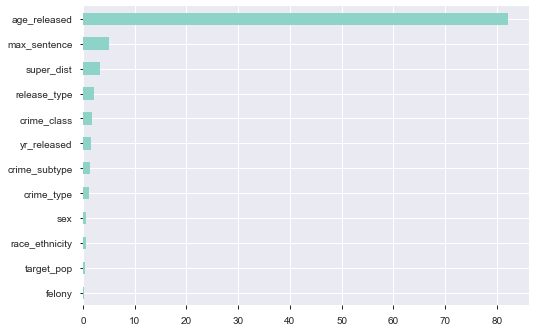

In [78]:
# Plotting Feature Importances
# important_feature_names = cb_clf.feature_names_
# important_feature_scores = cb_clf.feature_importances_

important_features = pd.Series(cb_clf.feature_importances_, index = cb_clf.feature_names_)
important_features.sort_values().plot(kind='barh')

### AUC-ROC Curve

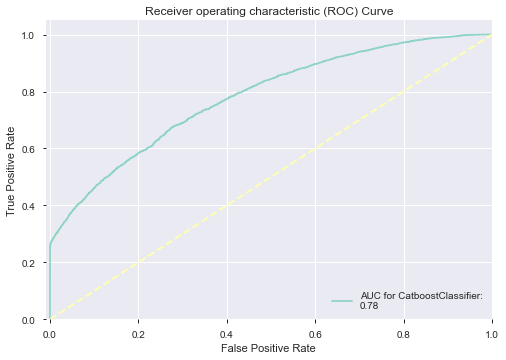

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
# from bs_ds.bs_ds import plot_a

y_test_pred = cb_clf.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

### Confusion Matrix


Normalized confusion matrix
[[0.75039695 0.24960305]
 [0.35950671 0.64049329]]


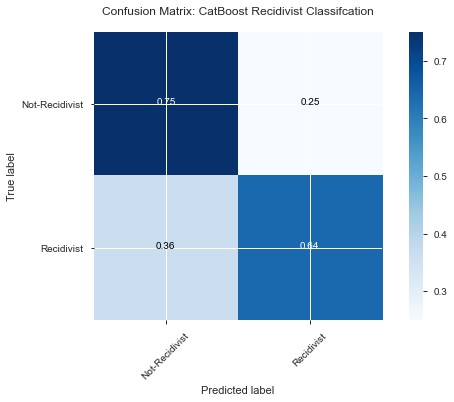

In [80]:
# import itertools
# from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Not-Recidivist', 'Recidivist'], normalize=True, cmap='Blues',
                      title='Confusion Matrix: CatBoost Recidivist Classifcation\n')

In [81]:
import cufflinks as cf
cf.go_offline()

In [86]:
# df.iplot(kind='histogram',barmode='grouped',categories='recidivist',x='age_released')

### Using SHAP values to explain model

In [87]:
df.columns

Index(['index', 'yr_released', 'report_year', 'race_ethnicity', 'age_released',
       'crime_class', 'crime_type', 'crime_subtype', 'release_type',
       'super_dist', 'recidivist', 'target_pop', 'sex', 'felony',
       'crime_types_combined', 'crime_class_type_subtype', 'max_sentence'],
      dtype='object')

# CONCLUSIONS
- **After adjusting for imbalanced classes, the most important factor for determining recidivism are:**
    - **Age at Release**
    - **Supervising Judicial District**
    - **Release Type**
    - **Crime Subtype**
    
    
## Recommendatons
- This model could be used to predict which prisoners due for release may at the greatest risk for recidivism.<br><br>
    - Using this knowledge, the state of Iowa could put new programs into action that target those at high risk for recidivism and provide additional assistance and guidance following release.<br><br>
    - Additionally, there could be additional counseling or education _prior_ to release to supply the inmate with tools and options to avoid returning to a life of crime.
    
# FUTURE DIRECTIONS
- With more time and reliable performance, would perform cross-validation of our final model.<br><br>
- Additional visuals summarizing the underlying features effects on recidivism.<br><br>
- Adapting more available visualization tools to better display the underpinning of the model.
<br><br>
- Exploration of the predictability of crimes types committed by recidivists.

### POST-REVIEW SUGGESTIONS / IDEAS:
- [ ] Try using reduction instead of SMOTE.
- [ ] seaborn catplot bar graphs
- [ ] Add tree or other visuals
    - Try Mike's SHAP plots

# 📕 04/23/20 Office Hours: Visualizations

In [88]:
def plot_hist_by_group(df, groupby_col='age_code',plot_col='recidivist',
                    barh=False, stacked=False, figsize=(8,6),label_map=None,title='Recidivism by Age',
                      xlabel='Group',rot=45):
    import pandas as pd
    import matplotlib.pyplot as plt
    
    font_dict= {}
    font_dict['title'] = {'size':18, 'family':'serif'}
    font_dict['ax_labels'] = {'size':16,'family':'serif'}
    font_dict['ticks'] = {'size':14,'family':'serif'}
    
    ## Get value counts as a dataframe
    counts = df.groupby(groupby_col)[plot_col].value_counts().unstack()
    counts.name='counts'
    counts = pd.DataFrame(counts)
    
    ## Map labels onto value_counts index
    if label_map is not None:
        counts[xlabel] = counts.index.to_series().apply(lambda x: label_map[x])
        counts.set_index(xlabel,inplace=True,drop=False)

    else:
        counts[xlabel] = counts.index.to_series()
        counts.set_index(xlabel,inplace=True,drop=True)        
    
    
    fig,ax=plt.subplots(figsize=figsize)
    ax.set_title(title,fontdict=font_dict['title'])

    if barh==False:
        counts.plot(kind='bar',stacked=stacked,ax=ax,rot=45)
        ax.set_ylabel('# of Prisoners', fontdict=font_dict['ax_labels'])
        ax.set_xlabel(xlabel,fontdict=font_dict['ax_labels'])
    else:
        counts.plot(kind='barh',stacked=stacked,ax=ax,rot=rot)
        ax.set_xlabel('# of Prisoners', fontdict=font_dict['ax_labels'])
        ax.set_ylabel(xlabel,fontdict=font_dict['ax_labels'])

    # ax.set_ylabel('# of Prisoners', fontdict=font_dict['ax_labels'])
    # ax.set_xlabel(xlabel,fontdict=font_dict['ax_labels'])
    ax.tick_params(labelsize= font_dict['ticks']['size'])

    plt.tight_layout()
    plt.show()
    return fig,ax

## Want to plot important features by target

- Making reverse encoding map to get back actual ages

In [90]:
age_lookup = {v:k for k,v in age_map.items()}
age_lookup

{0: 'Under 25', 1: '25-34', 2: '35-44', 3: '45-54', 4: '55 and Older'}

In [104]:
target = 'recidivist'
plot_col ='age_released'

counts = pd.DataFrame(df.groupby(target)[plot_col].value_counts(normalize=True))#.unstack()
counts

age_released
recidivist age_released              
0          1                   0.3509
           2                   0.2445
           3                   0.1815
           0                   0.1637
           4                   0.0593
1          1                   0.3967
           2                   0.2355
           0                   0.1957
           3                   0.1433
           4                   0.0288

In [105]:
counts.columns= ['% of Group']#.reset_index(level=0)
counts.reset_index(inplace=True)
counts

,recidivist,age_released,% of Group
0,0,1,0.3509
1,0,2,0.2445
2,0,3,0.1815
3,0,0,0.1637
4,0,4,0.0593
5,1,1,0.3967
6,1,2,0.2355
7,1,0,0.1957
8,1,3,0.1433
9,1,4,0.0288


In [106]:
counts['age_released'] = counts['age_released'].map(age_lookup)
counts

,recidivist,age_released,% of Group
0,0,25-34,0.3509
1,0,35-44,0.2445
2,0,45-54,0.1815
3,0,Under 25,0.1637
4,0,55 and Older,0.0593
5,1,25-34,0.3967
6,1,35-44,0.2355
7,1,Under 25,0.1957
8,1,45-54,0.1433
9,1,55 and Older,0.0288


In [107]:
print( counts['age_released'].values)

['25-34' '35-44' '45-54' 'Under 25' '55 and Older' '25-34' '35-44'
 'Under 25' '45-54' '55 and Older']


In [68]:
## Set column order
order = ['Under 25' ,'25-34', '35-44', '45-54' , '55 and Older']

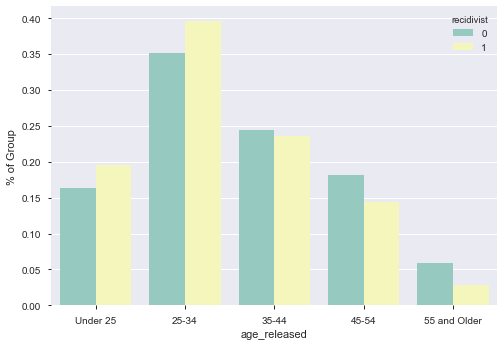

In [111]:
## use seaborn's barplot with hue=target
sns.barplot(y='% of Group',order=order,data=counts, x= plot_col,hue=target)

### Using correlation to plot relationship of features vs target

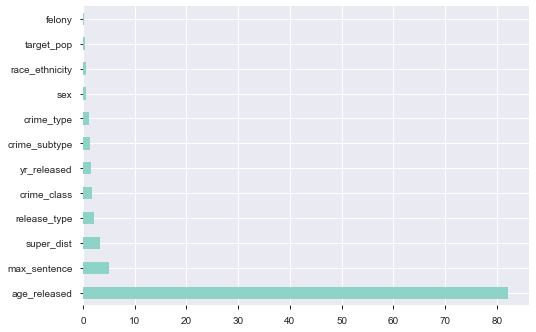

In [116]:
important_features = pd.Series(cb_clf.feature_importances_, index = cb_clf.feature_names_)
important = important_features.sort_values(ascending=False)
important.plot(kind='barh')

In [117]:
col_order = list(important.index)
col_order

['age_released',
 'max_sentence',
 'super_dist',
 'release_type',
 'crime_class',
 'yr_released',
 'crime_subtype',
 'crime_type',
 'sex',
 'race_ethnicity',
 'target_pop',
 'felony']

In [128]:
corr = pd.concat([X_train,y_train],axis=1).corr()
corr

,max_sentence,age_released,yr_released,race_ethnicity,crime_class,release_type,crime_type,crime_subtype,target_pop,sex,super_dist,felony,recidivist
max_sentence,1.0000,0.1127,0.0079,0.0058,-0.1393,0.0280,-0.2406,0.2801,0.1211,-0.0306,-0.1398,0.2951,0.0031
age_released,0.1127,1.0000,0.0109,0.0414,0.0246,-0.0106,-0.0254,0.0082,-0.0293,0.0333,-0.0085,0.0150,-0.1000
yr_released,0.0079,0.0109,1.0000,0.0144,0.0309,0.1937,-0.0468,-0.0117,0.0166,0.0385,-0.2413,0.0182,0.0756
race_ethnicity,0.0058,0.0414,0.0144,1.0000,0.0110,0.0511,-0.0207,0.0019,0.0167,0.0393,-0.0299,0.0033,0.0067
crime_class,-0.1393,0.0246,0.0309,0.0110,1.0000,-0.0144,-0.1525,-0.0077,0.1067,-0.0083,-0.1276,0.7375,-0.0117
release_type,0.0280,-0.0106,0.1937,0.0511,-0.0144,1.0000,0.0157,0.1006,0.3232,0.0126,-0.3068,-0.0174,0.0829
crime_type,-0.2406,-0.0254,-0.0468,-0.0207,-0.1525,0.0157,1.0000,-0.5070,-0.1104,-0.0646,0.1784,-0.2905,-0.0893
crime_subtype,0.2801,0.0082,-0.0117,0.0019,-0.0077,0.1006,-0.5070,1.0000,0.0796,0.0262,-0.1018,0.1835,0.0186
target_pop,0.1211,-0.0293,0.0166,0.0167,0.1067,0.3232,-0.1104,0.0796,1.0000,0.0205,-0.5218,0.1725,0.1025
sex,-0.0306,0.0333,0.0385,0.0393,-0.0083,0.0126,-0.0646,0.0262,0.0205,1.0000,-0.0464,-0.0054,-0.0837


In [131]:
corr = corr[col_order]
corr

,age_released,max_sentence,super_dist,release_type,crime_class,yr_released,crime_subtype,crime_type,sex,race_ethnicity,target_pop,felony
max_sentence,0.1127,1.0000,-0.1398,0.0280,-0.1393,0.0079,0.2801,-0.2406,-0.0306,0.0058,0.1211,0.2951
age_released,1.0000,0.1127,-0.0085,-0.0106,0.0246,0.0109,0.0082,-0.0254,0.0333,0.0414,-0.0293,0.0150
yr_released,0.0109,0.0079,-0.2413,0.1937,0.0309,1.0000,-0.0117,-0.0468,0.0385,0.0144,0.0166,0.0182
race_ethnicity,0.0414,0.0058,-0.0299,0.0511,0.0110,0.0144,0.0019,-0.0207,0.0393,1.0000,0.0167,0.0033
crime_class,0.0246,-0.1393,-0.1276,-0.0144,1.0000,0.0309,-0.0077,-0.1525,-0.0083,0.0110,0.1067,0.7375
release_type,-0.0106,0.0280,-0.3068,1.0000,-0.0144,0.1937,0.1006,0.0157,0.0126,0.0511,0.3232,-0.0174
crime_type,-0.0254,-0.2406,0.1784,0.0157,-0.1525,-0.0468,-0.5070,1.0000,-0.0646,-0.0207,-0.1104,-0.2905
crime_subtype,0.0082,0.2801,-0.1018,0.1006,-0.0077,-0.0117,1.0000,-0.5070,0.0262,0.0019,0.0796,0.1835
target_pop,-0.0293,0.1211,-0.5218,0.3232,0.1067,0.0166,0.0796,-0.1104,0.0205,0.0167,1.0000,0.1725
sex,0.0333,-0.0306,-0.0464,0.0126,-0.0083,0.0385,0.0262,-0.0646,1.0000,0.0393,0.0205,-0.0054


In [134]:
corr.loc['recidivist']

age_released     -0.1000
max_sentence      0.0031
super_dist       -0.2001
release_type      0.0829
crime_class      -0.0117
yr_released       0.0756
crime_subtype     0.0186
crime_type       -0.0893
sex              -0.0837
race_ethnicity    0.0067
target_pop        0.1025
felony            0.0003
Name: recidivist, dtype: float64

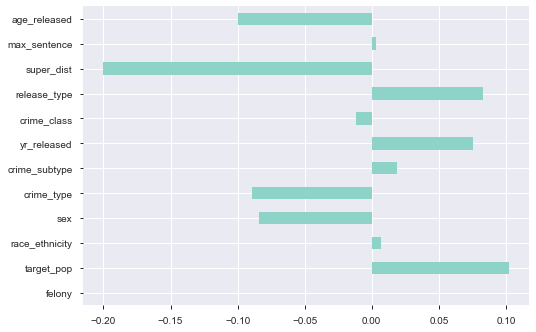

In [138]:
corr.loc['recidivist'][col_order[::-1]].plot(kind='barh')

## BOOKMARK: VISUALIZING TREES

In [139]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
help(clf)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=100)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.22
 |         The default value of ``n_estimators`` changed from 10 to 100
 |         in 0.22.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for th

In [140]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=25285333, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1639600978, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

In [142]:
def visualize_tree(tree,feature_names=None,class_names=['0','1'],
                   kws={},save_filename=None,format_='png',save_and_show=False):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(tree,feature_names=feature_names, 
                                   class_names=class_names,**tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    
    if save_filename is not None:
        graph.render(save_filename)
        if save_and_show:
            display(graph)
        else:
            print(f'[i] Tree saved as {save_filename}.{format_}')
    else:
        display(graph)

In [143]:
visualize_tree(clf.estimators_[0],save_filename='tree_from_forest')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.11981 to fit


[i] Tree saved as tree_from_forest.png
